# __Part 2 - The Investigation of the Distribution of Loans from Prosper Loan Data__
### _by Abdullah Akintobi_

## Investigation Overview
In this investigation, I wanted is look at the distribution of Loans of Prosper to help them understand how their loans are distribuated from the year 2005 to 2014. The main focus was on loan information, such as borrower state, borrower stated income, loan original amount and monthly loan payment.

## Dataset Overview

This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I focused my exploration on 13 of them. The variables I involved in my explanatory presentation are "Term", "LoanStatus", "BorrowerState", "StatedMonthlyIncome", "LoanOriginalAmount", "LoanOriginationDate", "LoanOriginationQuarter", "MonthlyLoanPayment". Eight Hundred Seventy-one duplicated data points were removed from the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe with specific columns (df_columns).
df_columns = [
    "LoanNumber",
    "Term",
    "LoanStatus",
    "BorrowerRate",
    "BorrowerState",
    "IncomeVerifiable",
    "StatedMonthlyIncome",
    "LoanOriginalAmount",
    "LoanOriginationDate",
    "LoanOriginationQuarter",
    "MonthlyLoanPayment",
    "Investors",
]
loan_data = pd.read_csv("prosperLoanData.csv", usecols=df_columns)
loan_data = loan_data.loc[:, df_columns]

In [3]:
# Drop duplicated rows
loan_data = loan_data.drop_duplicates()

In [4]:
# Convert LoanOriginationDate to datetime64 datatype
loan_data["LoanOriginationDate"] = loan_data["LoanOriginationDate"].astype(
    "datetime64[ns]"
)

In [5]:
# Convert "StatedMonthlyIncome" to integer for analysis improvement
loan_data["StatedMonthlyIncome"] = loan_data["StatedMonthlyIncome"].astype(int)

In [6]:
# Convert "ListingNumber" to category datatype
loan_data["LoanNumber"] = loan_data["LoanNumber"].astype("category")

### __Distribution of Loan Status__
There are 55730 Current loans, 38061 Completed loans, 11992 Charged off loans, 5018 Defaulted loans, 2057 Past Due loans, 203 loan final payment in progress and 5 Cancelled loans status. Also, approximately 10.606% of the loan status is Chargedoff which is a bit high as just approximately 33.663% loans are completed, which proved that most borrowed has missed payments for several months leading to creditor giving up trying to collect the payments.

The proportion of each loan status are as follows:
- The proportion of Current is 49.29%
- The proportion of Completed is 33.663%
- The proportion of Chargedoff is 10.606%
- The proportion of Defaulted is 4.438%
- The proportion of Past Due is 1.819%
- The proportion of InProgress is 0.18%
- The proportion of Cancelled is 0.004%


In [7]:
# Define a function that changes Past Due (with day range) to just "Past Due"
def change_text(x):
    past_position = x.find("Past")
    # If not Past Due
    if past_position == -1:
        x = x
    else:  # Change to Past Due
        x = x[0:8]
    return x

In [8]:
# Remove links from text with our remove_link function
loan_data["LoanStatus"] = loan_data["LoanStatus"].apply(change_text)

In [9]:
# Change "FinalPaymentInProgress" to "InProgress"
loan_data["LoanStatus"] = loan_data["LoanStatus"].str.replace(
    "FinalPaymentInProgress", "InProgress"
)

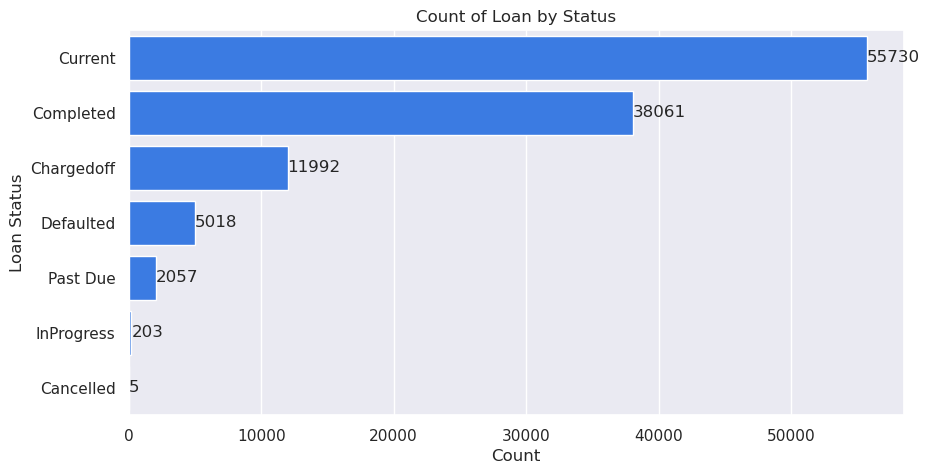

In [10]:
# Plot a bar chart of Months againt its frequency
sns.set(rc={"figure.figsize": (10, 5)})
pl = sns.countplot(
    data=loan_data,
    y="LoanStatus",
    order=loan_data["LoanStatus"].value_counts().index,
    color="#1F75FE",
)
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.title("Count of Loan by Status")
pl.bar_label(pl.containers[0]);

### __Distribution of loan by state__
Most of the borrowers amounting to 14594 loans are from CA (California) and occupies approximately, 12.91% of the loans. Also, there are 5515 loans that the borrower doesn't specify his/her state.

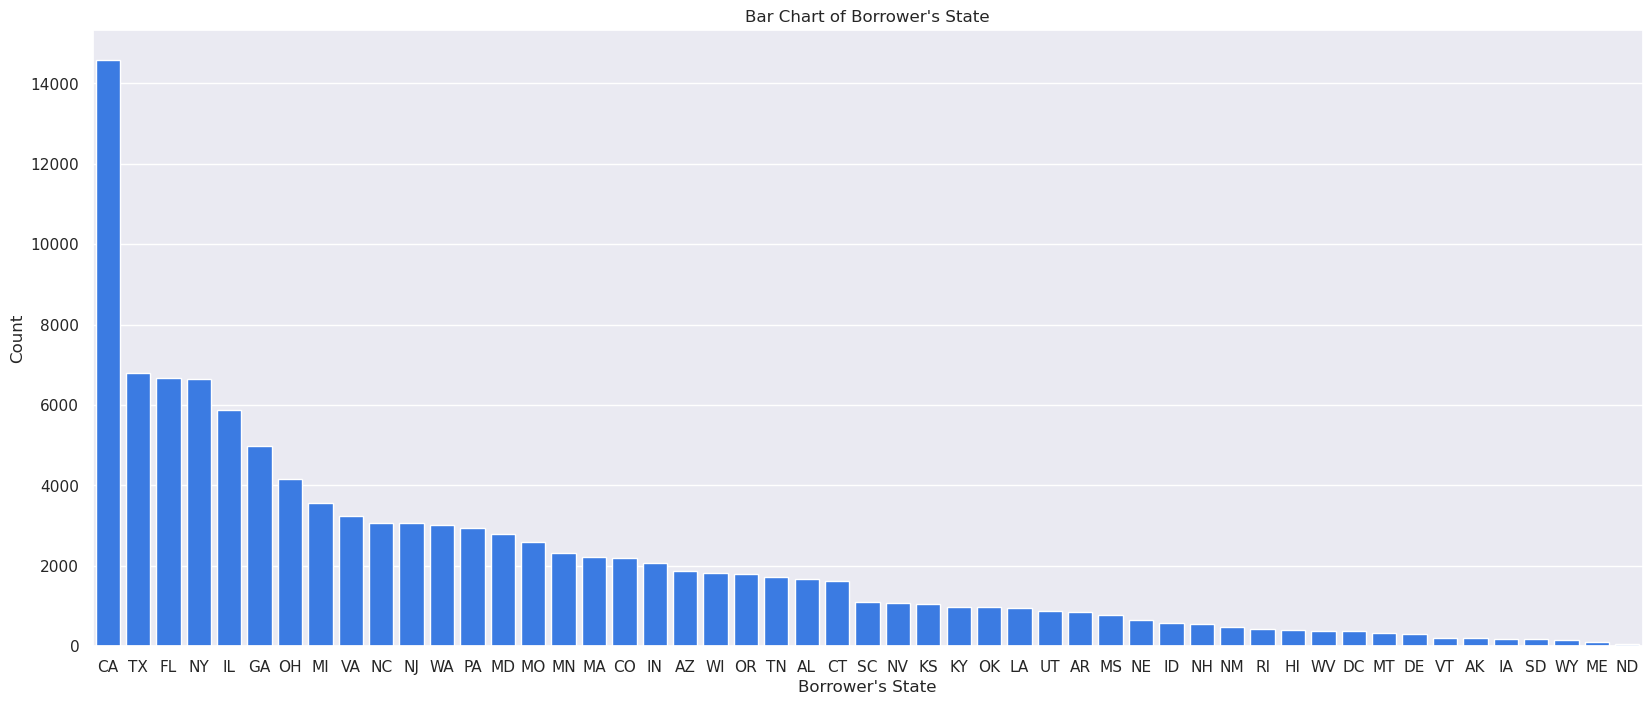

In [11]:
# Plot Borrower's State Bar Chart
sns.set(rc={"figure.figsize": (20, 8)})
sns.countplot(
    data=loan_data,
    x="BorrowerState",
    order=loan_data["BorrowerState"].value_counts().index,
    color="#1F75FE",
)
plt.xlabel("Borrower's State")
plt.ylabel("Count")
plt.title("Bar Chart of Borrower's State");

### __Distribution of the borrower Stated Monthly Income__
Most of the borrowers stated monthly income are from 3k to 6k. There are also a lots of outliers in the data set with a wide range between the outliers. Also, when the dataset was investigated further, it was observered that most of the borrowers monthly income are false.

In [12]:
# Replace 1,750,002 monthly income to $175,000 to make my histogram more readable.
loan_data["StatedMonthlyIncome"] = loan_data["StatedMonthlyIncome"].replace(
    1750002, 175000
)

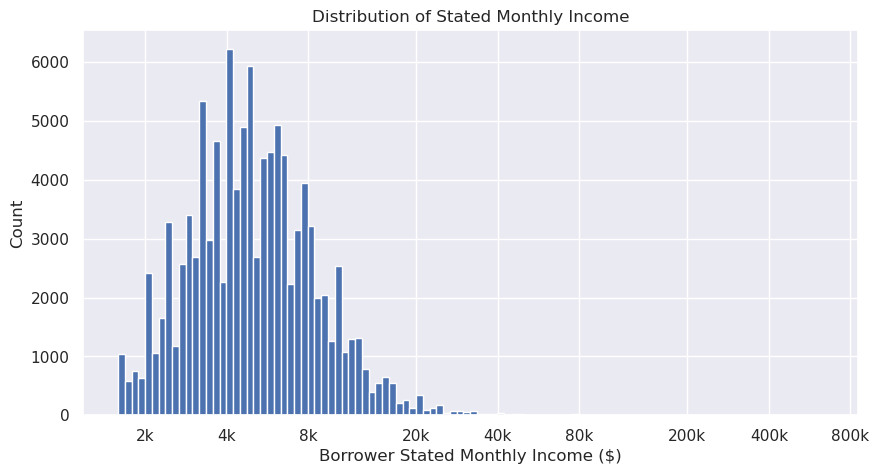

In [13]:
# Histogram of all Stated Monthly Income in dollars on a log scale
log_binsize = 0.025
bins = 10 ** np.arange(
    3.2, np.log10(loan_data["StatedMonthlyIncome"].max()) + log_binsize, log_binsize
)

plt.figure(figsize=[10, 5])
plt.hist(data=loan_data, x="StatedMonthlyIncome", bins=bins)
plt.xscale("log")
plt.ylabel("Count")
plt.title("Distribution of Stated Monthly Income")
plt.xticks(
    [2e3, 4e3, 8e3, 2e4, 4e4, 8e4, 2e5, 4e5, 8e5],
    ["2k", "4k", "8k", "20k", "40k", "80k", "200k", "400k", "800k"],
)
plt.xlabel("Borrower Stated Monthly Income ($)");

### __Distribution of the Loan Original Amount__
There are three peaks at 4K, 10K, and 15K Loan Original Amount which shows that most demanded loan amount by borrower are `$4000, $15000 and $10000` respectively.

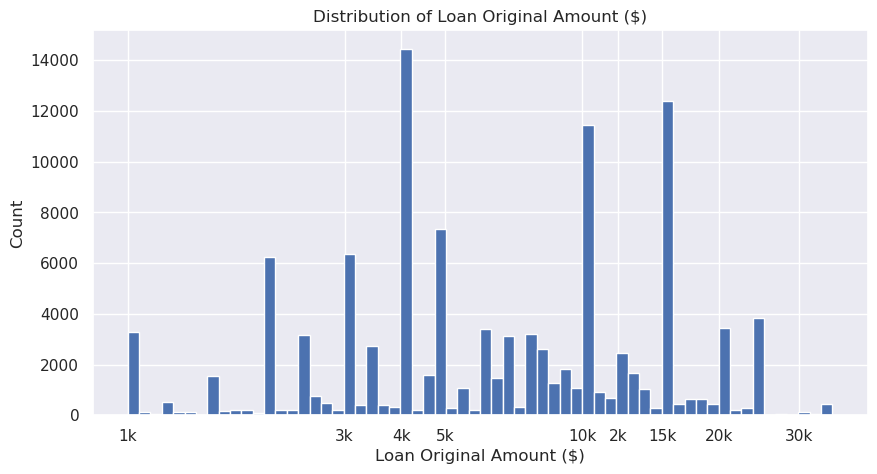

In [14]:
# Plot the loan original amount against a log scale because it has a long tail
sns.set(rc={"figure.figsize": (10, 5)})
log_binsize = 0.025
bins_log = 10 ** np.arange(
    3, np.log10(loan_data["LoanOriginalAmount"].max()) + log_binsize, log_binsize
)
plt.hist(data=loan_data, x="LoanOriginalAmount", bins=bins_log)
plt.xscale("log")
plt.xticks(
    [1e3, 12e3, 3e3, 4e3, 5e3, 1e4, 1.5e4, 2e4, 3e4],
    ["1k", "2k", "3k", "4k", "5k", "10k", "15k", "20k", "30k"],
)
plt.ylabel("Count")
plt.xlabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($)");

### __The year (in quarters) that has the highest loan demands__
The amount of loans increases rapidly within the year 2013

In [15]:
# Define a function that changes "LoanOriginationQuarter" values from "Quarter Year" format to
# "Year Quarter" (i.e Q4 2005 to 2005 Q4)
def change_year(year):
    find_Q = year.find("Q")
    # If no Q
    if find_Q == -1:
        year = year
    else:  # Change the format
        year += " " + year[:2]
        year = year[-7:]
    return year

In [16]:
# Remove links from text with our remove_link function
loan_data["LoanOriginationQuarter"] = loan_data["LoanOriginationQuarter"].apply(
    change_year
)

In [17]:
# Change "LoanOriginationQuarter" column to datatype category
loan_data["LoanOriginationQuarter"] = loan_data["LoanOriginationQuarter"].astype(
    "category"
)

In [18]:
# Create a dataframe that shows the counts of each year quarter
Quarter = list(loan_data["LoanOriginationQuarter"].value_counts(sort=False).index)
Count = list(loan_data["LoanOriginationQuarter"].value_counts(sort=False))
Quarter_df = pd.DataFrame({"Quarter": Quarter, "Count": Count})

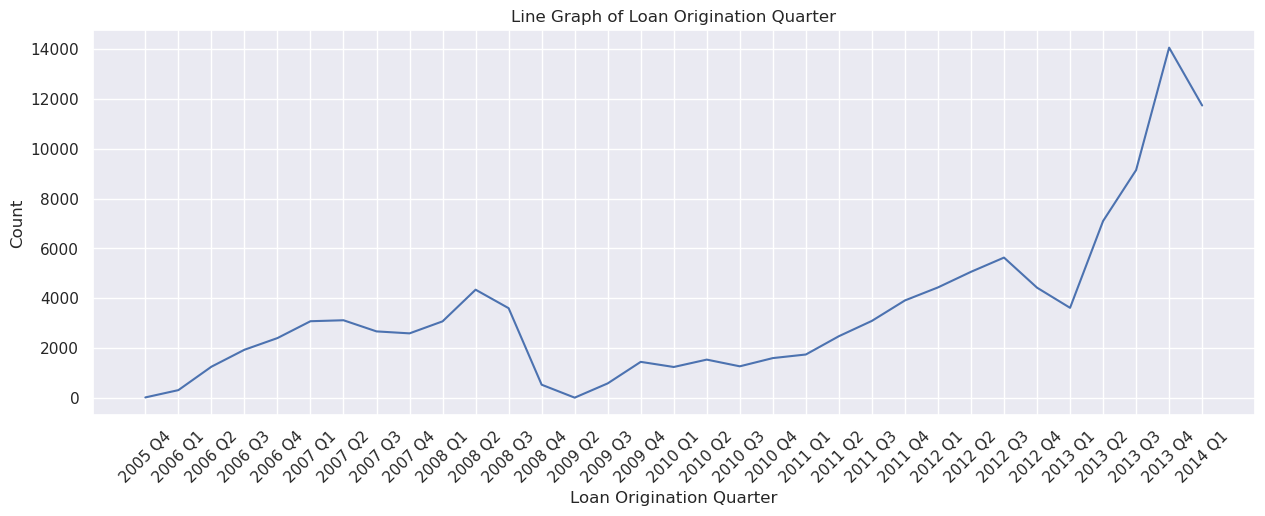

In [19]:
# Create a line graph of Loan Origination Quarter to track its changes
# over the periods of time
sns.set(rc={"figure.figsize": (15, 5)})
sns.lineplot(data=Quarter_df, x="Quarter", y="Count")
plt.xticks(rotation=45)
plt.xlabel("Loan Origination Quarter")
plt.title("Line Graph of Loan Origination Quarter");

### __How Loan Original Amount changes with time (yearly quarters)__
There is a huge decrease of loans amount between the forth quarter of the year 2008 and the second quarter of the year 2009 which was due to the Financial Crisis in the US during those period. The amount of loans also increases by year from the year 2010 to year 2014.

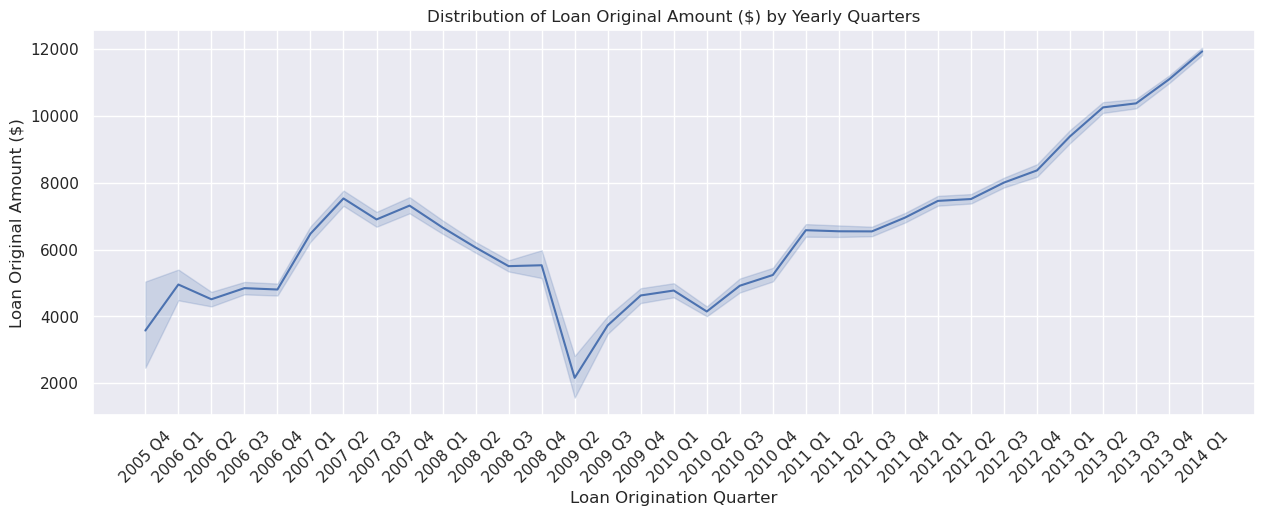

In [20]:
# Create a line graph of the Distribution of Loan Original Amount ($) by Yearly Quarters
sns.set(rc={"figure.figsize": (15, 5)})
sns.lineplot(data=loan_data, x="LoanOriginationQuarter", y="LoanOriginalAmount")
plt.xticks(rotation=45)
plt.xlabel("Loan Origination Quarter")
plt.ylabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($) by Yearly Quarters");

### __Distribution of loans by state__
Most of the borrowers are from `California (CA)` and total amount of loans that went to the state is `$130,687,003` amounting to approximately `13.9%` of the total amount loan `($940,116,915)` given out by the company.

In [21]:
# Group loan dataset by "BorrowerState"
groupby_state = loan_data.groupby(["BorrowerState"]).sum()

In [22]:
# Sort the grouped loan dataset by "LoanOriginalAmount"
groupby_state.sort_values(by="LoanOriginalAmount", ascending=False, inplace=True)

In [23]:
# Store the states in order in a list called "states"
states = groupby_state.index

In [24]:
# Store the total loan amount of each state in descending order in a list called total_loan_amount
total_loan_amount = groupby_state["LoanOriginalAmount"].tolist()

In [25]:
# Create a dataframe of states and Total Loan Amount ($)
total_loan_by_state = pd.DataFrame(
    {"State": states, "Total Loan Amount ($)": total_loan_amount}
)

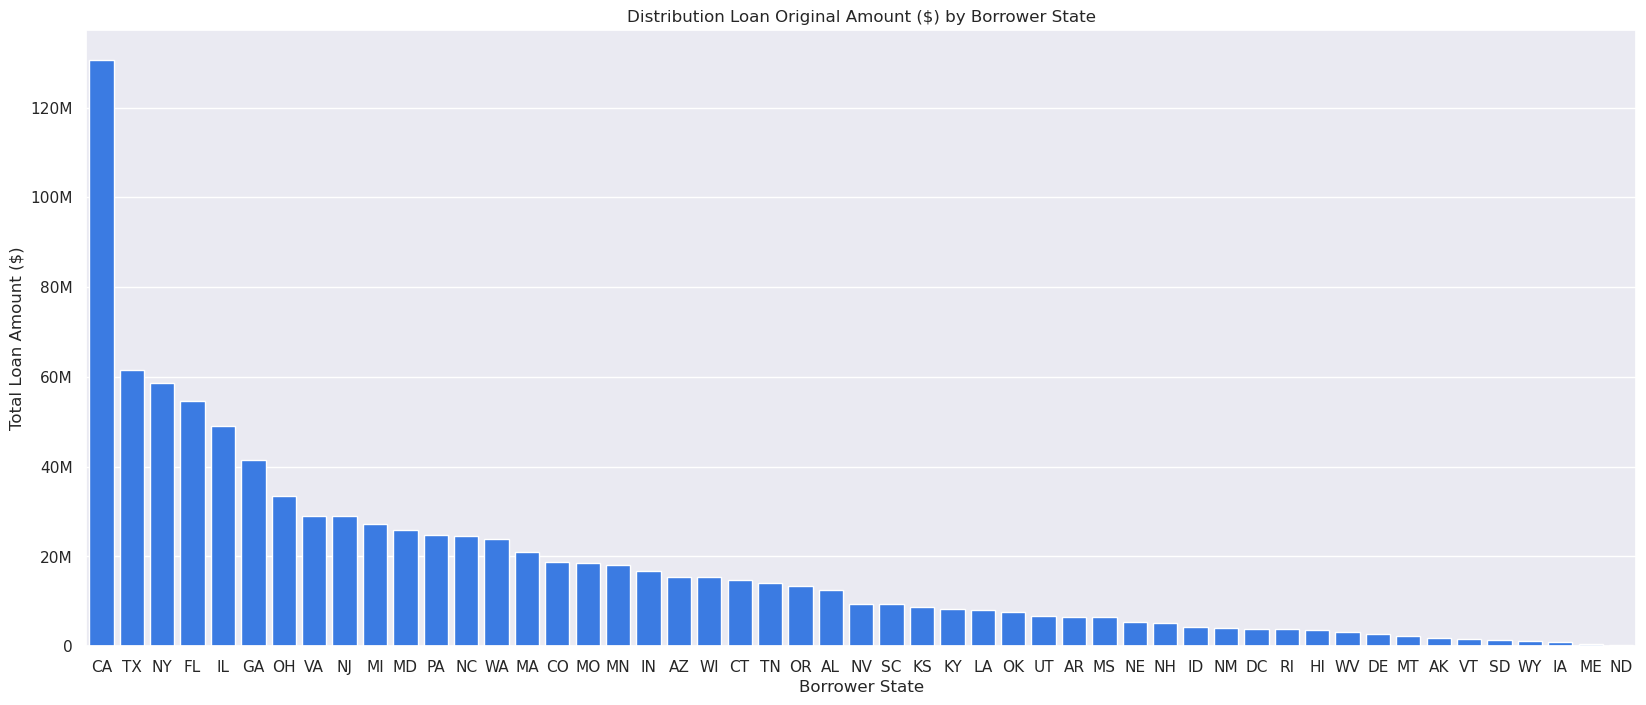

In [26]:
# Bar Chart of Total Loan Amount ($) by Borrower State
sns.set(rc={"figure.figsize": (20, 8)})
sns.barplot(
    data=total_loan_by_state, x="State", y="Total Loan Amount ($)", color="#1F75FE"
)
plt.title("Distribution Loan Original Amount ($) by Borrower State")
plt.xlabel("Borrower State")
plt.yticks(
    [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8, 1.2e8],
    [0, "20M", "40M", "60M", "80M", "100M", "120M"],
);

### __The relationship between Loan Original Amount, Loan Origination Year and Term__
The 12 months and 60 months loan terms were introduced in the year 2010 and 12 months loans were later stoped in the year 2013 with increase in 12 months loan terms within the period. It also shows the increasing in demand of loans from the year 2012 for all loan terms.

In [27]:
# Create the "new_loan_data" dataframe
new_loan_data = pd.DataFrame(
    {
        "DayName": loan_data.LoanOriginationDate.dt.day_name(),
        "Month": loan_data.LoanOriginationDate.dt.month,
        "Day": loan_data.LoanOriginationDate.dt.day,
        "Year": loan_data.LoanOriginationDate.dt.year,
        "Term": loan_data.Term,
        "LoanStatus": loan_data.LoanStatus,
        "BorrowerRate": loan_data.BorrowerRate,
        "BorrowerState": loan_data.BorrowerState,
        "IncomeVerification": loan_data.IncomeVerifiable,
        "StatedMonthlyIncome": loan_data.StatedMonthlyIncome,
        "LoanOriginalAmount": loan_data.LoanOriginalAmount,
        "MonthlyLoanPayment": loan_data.MonthlyLoanPayment,
        "Investors": loan_data.Investors,
    }
)

In [28]:
# Change True and False to Verified and Unverified respectively in "IncomeVerification" column
new_loan_data.IncomeVerification.replace(
    [True, False],
    ["Verified", "Unverified"],
    inplace=True,
)

In [29]:
# Replace number 1 to 12 with Jan to Dec
new_loan_data.Month.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    inplace=True,
)

In [30]:
# Change DayName column to categorical datatype
new_loan_data["DayName"] = pd.Categorical(
    new_loan_data.DayName,
    categories=[
        "Sunday",
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
    ],
    ordered=True,
)

In [31]:
# Change Month column to categorical datatype
new_loan_data["Month"] = pd.Categorical(
    new_loan_data.Month,
    categories=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    ordered=True,
)

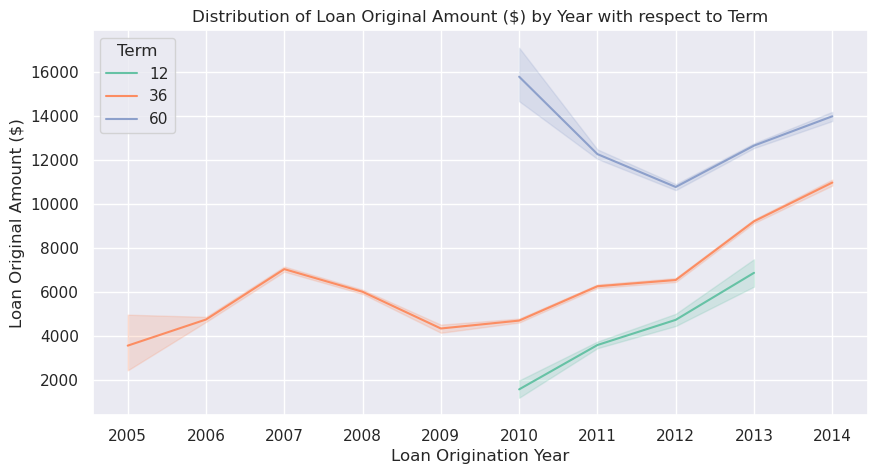

In [32]:
# Graph of Loan Original Amount ($) by Year with respect to Term
sns.set_palette("PuBuGn_d")
sns.set(rc={"figure.figsize": (10, 5)})
sns.lineplot(
    data=new_loan_data,
    x="Year",
    y="LoanOriginalAmount",
    hue="Term",
    palette="Set2",
)
plt.xlabel("Loan Origination Year")
plt.xticks(sorted(new_loan_data.Year.unique()))
plt.ylabel("Loan Original Amount ($)")
plt.title("Distribution of Loan Original Amount ($) by Year with respect to Term");

### __Relationship between Loan Original Amount and Monthly Loan Payment with repect to Year__
There is a positive correlation between Loan Original Amount and Monthly Loan Payment and increase in Loan Original Amount and Monthly Loan Payment by Year.

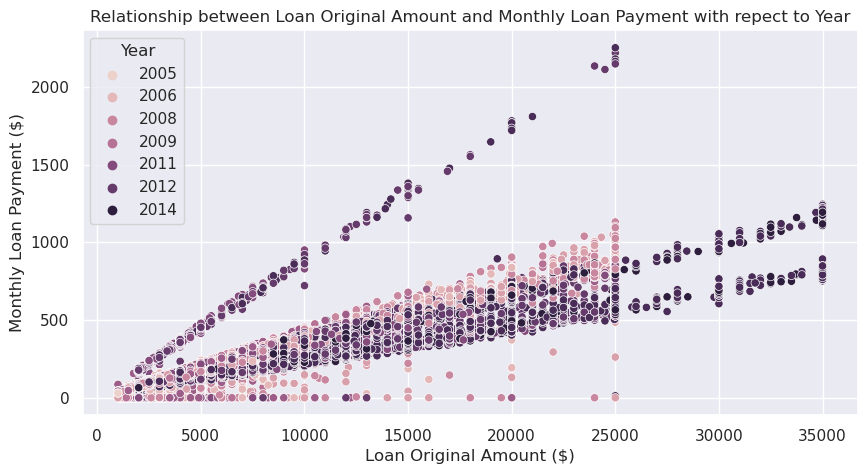

In [33]:
# Scatterplot of the Relationship between Loan Original Amount and Monthly Loan Payment with repect to Year
sns.scatterplot(
    data=new_loan_data, x="LoanOriginalAmount", y="MonthlyLoanPayment", hue="Year"
)
plt.xlabel("Loan Original Amount ($)")
plt.ylabel("Monthly Loan Payment ($)")
plt.title(
    "Relationship between Loan Original Amount and Monthly Loan Payment with repect to Year"
);

### __Thank You For Your Time And Attention!__

In [34]:
## Generate presentation
# !jupyter nbconvert Part2-Explanatory-Data-Analysis.ipynb --to slides --post serve --no-input --no-prompt